In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("irctc.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-14,626.000000,743.799988,625.000000,727.750000,727.750000,45270607
1,2019-10-15,736.000000,747.400024,696.049988,713.150024,713.150024,10530041
2,2019-10-16,714.000000,721.000000,698.250000,700.650024,700.650024,3476306
3,2019-10-17,700.099976,733.000000,687.150024,724.299988,724.299988,5032930
4,2019-10-18,725.000000,789.900024,716.049988,779.150024,779.150024,9733230


In [3]:
data.insert(0, "Day", list(i for i in range(len(data))), True)

In [4]:
data.head()

,Day,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-10-14,626.000000,743.799988,625.000000,727.750000,727.750000,45270607
1,1,2019-10-15,736.000000,747.400024,696.049988,713.150024,713.150024,10530041
2,2,2019-10-16,714.000000,721.000000,698.250000,700.650024,700.650024,3476306
3,3,2019-10-17,700.099976,733.000000,687.150024,724.299988,724.299988,5032930
4,4,2019-10-18,725.000000,789.900024,716.049988,779.150024,779.150024,9733230


In [5]:
data.shape

(24, 8)

In [6]:
x = np.array(list(data.Day))
y = np.array(list(data.Close))

In [7]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [8]:
y

array([727.75    , 713.150024, 700.650024, 724.299988, 779.150024,
       844.700012, 900.299988, 902.049988, 899.049988, 907.700012,
       883.099976, 890.450012, 881.700012, 890.5     , 883.450012,
       881.5     , 884.299988, 881.5     , 876.900024, 932.900024,
       932.049988, 907.299988, 928.200012, 922.150024])

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
reg = LinearRegression()

In [12]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [13]:
model = [
    ("LR",reg),
    ("SVR-Lin",svr_lin),
    ("SVR-Poly",svr_poly),
    ("SVR-RBF",svr_rbf),
]

In [14]:
for name,models in model:
    clf = models
    clf.fit(x[:, np.newaxis],y)
    pred = clf.predict(x[:, np.newaxis])
    score = clf.score(pred[:, np.newaxis],y)
    print("{}, Score - {}".format(name,score))

LR, Score - -9203.47336172275
SVR-Lin, Score - -4466.516154790807
SVR-Poly, Score - -2541072362034.893
SVR-RBF, Score - -0.002942176622540371


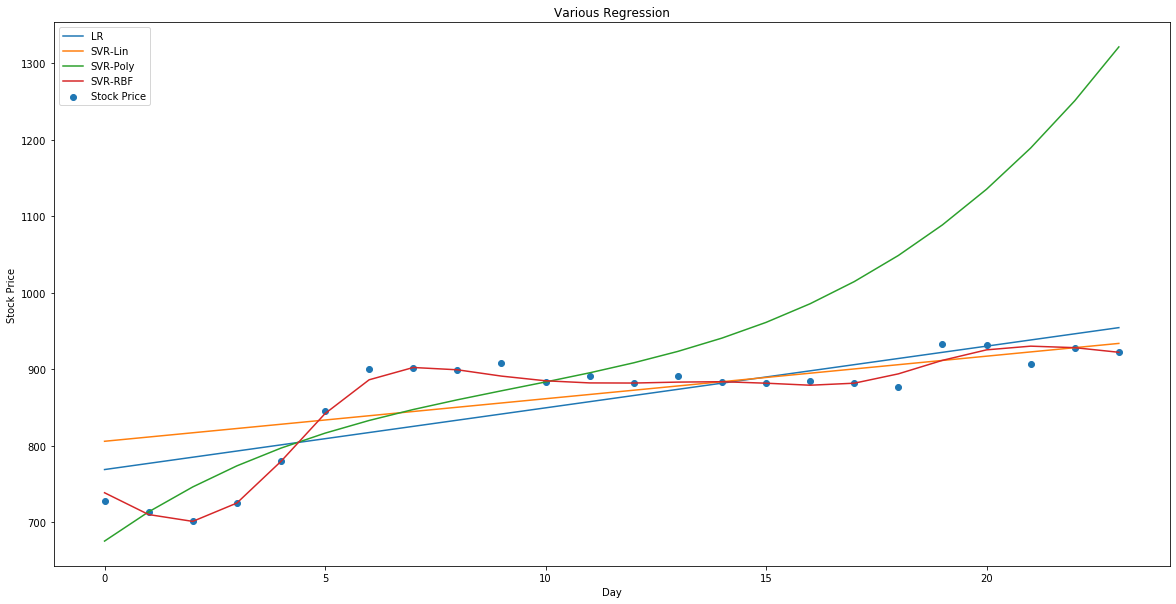

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, label = 'Stock Price')
for name,models in model:
    clf = models
    plt.plot(x, clf.predict(x[:,np.newaxis]), label = name)
plt.legend()
plt.title('Various Regression')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()

In [16]:
# predicting future values for one week
df = dict()
a = np.array(list(i for i in range(len(data),len(data)+7)))
for name,models in model:
    clf = models
    tmp = pd.DataFrame({"Day":a,"Close":clf.predict(a[:,np.newaxis])})
    df["{}".format(name)] = tmp

In [17]:
for i in df:
    print(i)

LR
SVR-Lin
SVR-Poly
SVR-RBF


In [18]:
new_data = dict()
for i in df:
    new_data[i] = pd.merge(data,df[i],on=["Day","Close"],how="outer")

In [19]:
for i in new_data:
    print(i)

LR
SVR-Lin
SVR-Poly
SVR-RBF


In [20]:
new_data["LR"]

,Day,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-10-14,626.000000,743.799988,625.000000,727.750000,727.750000,45270607.0
1,1,2019-10-15,736.000000,747.400024,696.049988,713.150024,713.150024,10530041.0
2,2,2019-10-16,714.000000,721.000000,698.250000,700.650024,700.650024,3476306.0
3,3,2019-10-17,700.099976,733.000000,687.150024,724.299988,724.299988,5032930.0
4,4,2019-10-18,725.000000,789.900024,716.049988,779.150024,779.150024,9733230.0
5,5,2019-10-22,786.950012,866.750000,781.000000,844.700012,844.700012,9346788.0
6,6,2019-10-23,866.000000,909.900024,866.000000,900.299988,900.299988,9023269.0
7,7,2019-10-24,924.950012,953.500000,862.650024,902.049988,902.049988,11871313.0
8,8,2019-10-25,905.000000,916.000000,876.000000,899.049988,899.049988,3849535.0
9,9,2019-10-27,911.000000,925.000000,895.000000,907.700012,907.700012,1342257.0


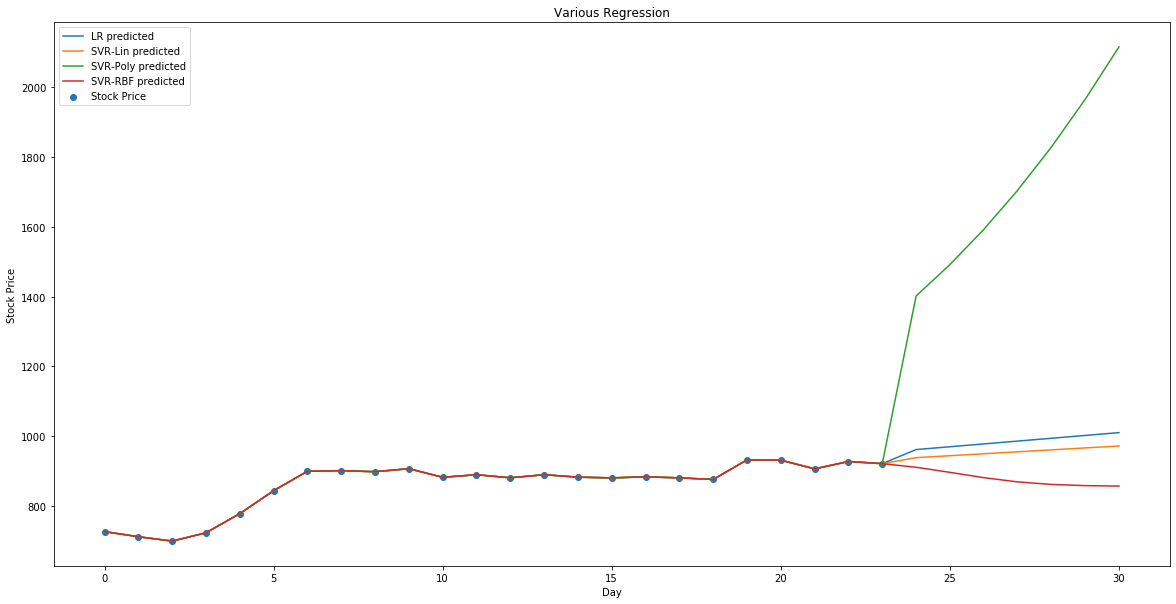

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, label = 'Stock Price')
for i in new_data:
    tmp = new_data[i]
    plt.plot(tmp["Day"], tmp["Close"], label = "{} predicted".format(i))
plt.legend()
plt.title('Various Regression')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()